In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset102.csv')
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['time'] = df['time'].dt.strftime("%Y-%m-%d %H:%M")
df.head()

,time,latitude,longitude,mag,depth,nst,gap,dmin
0,1950-09-24 12:23,34.033333,-119.641167,3.22,6.0,5.0,303.0,1.2250
1,1950-09-24 12:31,34.066667,-119.707000,2.74,6.0,2.0,358.0,1.2770
2,1950-09-24 22:56,34.708000,60.422000,5.68,15.0,NaN,NaN,NaN
3,1950-09-25 00:22,33.891000,-115.828333,2.82,6.0,5.0,318.0,1.0160
4,1950-09-25 07:46,33.336833,-116.031500,2.53,6.0,3.0,331.0,0.6959


In [3]:
#neo 
neo = pd.read_csv('D:/Project/Senior-Project-Earthquake-Prediction/NEOsDataset/NEOsq10LDto2050.csv')
neo['cd'] = pd.to_datetime(neo['cd'], format="%Y-%b-%d %H:%M")
neo['cd'] = neo['cd'].dt.strftime("%Y-%m-%d %H:%M")
neo.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2006 HX30,16,2433401.051,1950-04-29 13:14,0.018397,0.018397,0.018397,4.228013,4.193618,< 00:01,26.20
1,2019 QC4,8,2433517.584,1950-08-24 02:01,0.017833,0.010418,0.076828,9.504365,9.488631,2_17:15,23.50
2,2019 WT3,18,2433624.870,1950-12-09 08:53,0.023066,0.022829,0.023314,10.971436,10.960903,1:08,24.60
3,2021 WA5,4,2433626.124,1950-12-10 14:58,0.003123,0.000953,0.021212,5.407277,5.247145,4_18:50,27.29
4,523685,34,2433627.822,1950-12-12 07:43,0.012014,0.012003,0.012026,9.475064,9.451629,0:03,20.04


In [5]:
## magnetude > 5.00                 
#filter_dt = dt[(dt['latitude'] > 120) & (dt['longitude'] > 15)
ndt = df[['time','latitude','longitude','mag','depth']]
ndt = ndt[ndt['mag'] > 5]
ndt.head()

,time,latitude,longitude,mag,depth
2,1950-09-24 22:56,34.708,60.422,5.68,15.0
5,1950-09-25 23:16,9.864,126.264,5.96,25.0
6,1950-09-26 19:06,24.157,122.875,5.85,15.0
7,1950-09-27 03:37,19.844,-109.076,5.74,25.0
8,1950-09-28 03:29,23.095,121.481,6.06,15.0


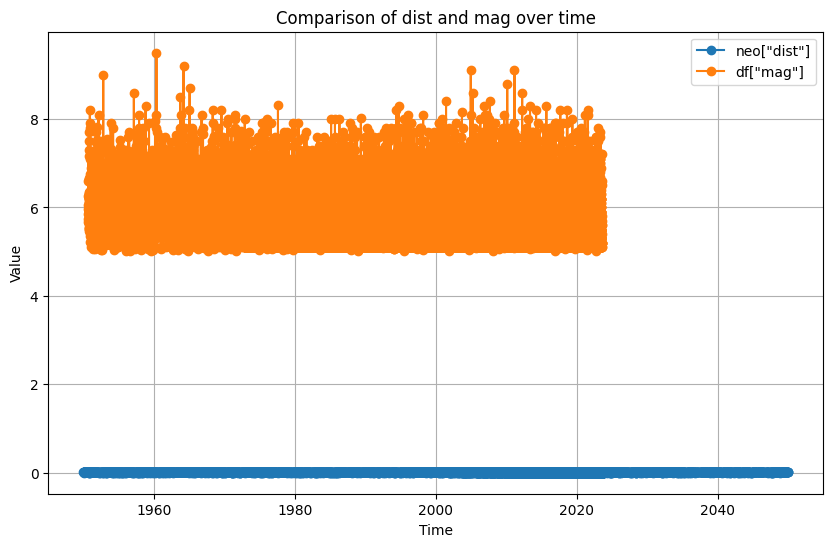

In [7]:
neo['cd'] = pd.to_datetime(neo['cd'], errors='coerce')
ndt['time'] = pd.to_datetime(ndt['time'], errors='coerce')
plt.figure(figsize=(10, 6))

plt.plot(neo['cd'], neo['dist'], label='neo["dist"]', marker='o')

plt.plot(ndt['time'], ndt['mag'], label='df["mag"]', marker='o')

plt.title('Comparison of dist and mag over time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()